# Principal Component Analysis

## Anonymizing Data

In [1]:
#Using the built in breast cancer dataset to anonymize the data

import pandas as pd
from sklearn.datasets import load_breast_cancer



In [2]:
data = load_breast_cancer()
df = pd.DataFrame(data=data.data,columns=data.feature_names)
pd.set_option("display.max_columns",6)
df.head()

,mean radius,mean texture,mean perimeter,...,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,...,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,...,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,...,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,...,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,...,0.1625,0.2364,0.07678


In [3]:
#Datasets contains 30 cols. the following statements will find the 30 principal components and apply StandardScaler to transform the data

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=30,random_state=0)
pca_data = pca.fit_transform(df)

scaler = StandardScaler()

anon_df = pd.DataFrame(scaler.fit_transform(pca_data))
pd.set_option("display.max_columns",8)
anon_df.head()

,0,1,2,3,...,26,27,28,29
0,1.743043,-3.440692,1.832695,-1.179529,...,-1.033900,0.767070,1.406020,0.841434
1,1.906779,0.182972,-1.335313,2.418269,...,-0.043492,-0.798802,0.484854,-1.267746
2,1.496120,0.458381,-0.064503,0.568556,...,0.092680,0.010964,-0.547972,0.484234
3,-0.611764,-0.788775,0.327197,-1.592188,...,0.008095,0.811865,-1.511794,-1.978890
4,1.397781,2.216483,0.051866,1.150718,...,1.716566,0.161769,1.260500,0.390467


## Visualizing High-Dimensional Data

<ipython-input-4-76a03bc731eb>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(pca_digits[:,0],pca_digits[:,1],c=digits.target,cmap=plt.cm.get_cmap("Paired",10))


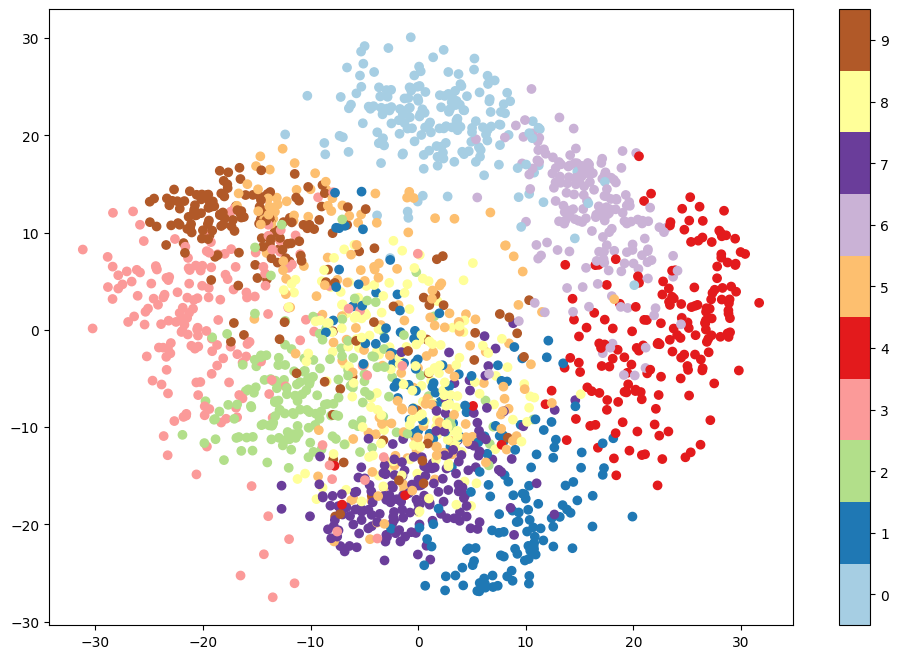

In [4]:
#Reducing the built in handwritten dataset from 64 dims to 2 using PCA

from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline


digits = load_digits()
pca = PCA(n_components=2,random_state=0)
pca_digits = pca.fit_transform(digits.data)

plt.figure(figsize=(12,8))
plt.scatter(pca_digits[:,0],pca_digits[:,1],c=digits.target,cmap=plt.cm.get_cmap("Paired",10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5,9.5)

<ipython-input-5-a79a81f7e6ae>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax.scatter(xs=pca_digits[:,0],ys=pca_digits[:,1],zs=pca_digits[:,2],c=digits.target,cmap=plt.cm.get_cmap("Paired",10))


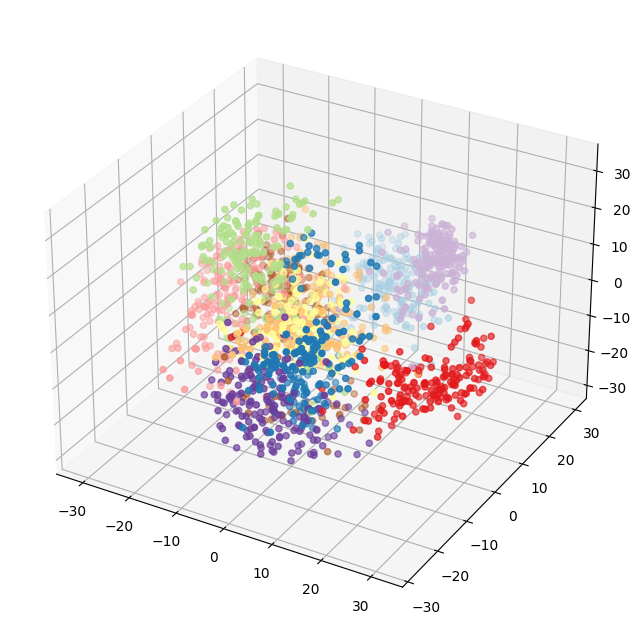

In [5]:
#Changing the dim to 3 and plotting in 3d

%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
pca = PCA(n_components=3,random_state=0)
pca_digits = pca.fit_transform(digits.data)

ax = plt.figure(figsize=(12,8)).add_subplot(111,projection="3d")
ax.scatter(xs=pca_digits[:,0],ys=pca_digits[:,1],zs=pca_digits[:,2],c=digits.target,cmap=plt.cm.get_cmap("Paired",10))

#Anomaly Dectection

## Using PCA to Detect Credit Card Fraud

In [6]:
#theory the loss incurred when an anomalous sample is PCAed and un-PCAed should be higher than the loss incurred when the same operation is 
#applied to a normal sample

#importing the credir card data

import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Data/creditcard.csv")
df.head()

,Time,V1,V2,V3,...,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,...,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,...,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,...,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,...,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,...,0.219422,0.215153,69.99,0


In [7]:
#Separate the samples by class
legit = df[df["Class"] == 0]
fraud = df[df["Class"] == 1]

In [8]:
#Dropping the time and Class cols

legit = legit.drop(["Time","Class"],axis=1)
fraud = fraud.drop(["Time","Class"],axis=1)


In [9]:
#Using PCA to reduce the 2 datasets from 29 to 26 dimensions and then invert the transform to restore each dataset to 29 dims

from sklearn.decomposition import PCA

pca = PCA(n_components=26,random_state=0)

legit_pca = pd.DataFrame(pca.fit_transform(legit),index=legit.index)
fraud_pca = pd.DataFrame(pca.transform(fraud),index=fraud.index)

legit_restored = pd.DataFrame(pca.inverse_transform(legit_pca),index=legit_pca.index)
fraud_restored = pd.DataFrame(pca.inverse_transform(fraud_pca),index=fraud_pca.index)

In [10]:
#function to compute the losses due to PCA

import numpy as np

def get_anomaly_scores(df_original,df_restored):
  loss = np.sum((np.array(df_original) - np.array(df_restored)) ** 2, axis=1)
  loss = pd.Series(data=loss,index=df_original.index)
  return loss


In [11]:
legit_scores = get_anomaly_scores(legit,legit_restored)
fraud_scores = get_anomaly_scores(fraud,fraud_restored)

<Axes: >

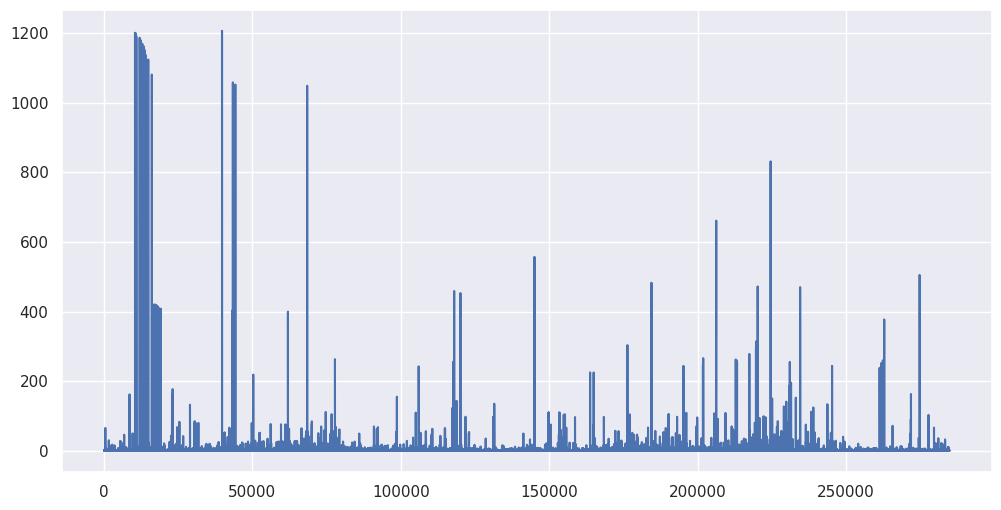

In [12]:
from ast import increment_lineno
#Plotting the losses incurred when the legit transactions were transformed and restored

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

legit_scores.plot(figsize = (12,6))

<Axes: >

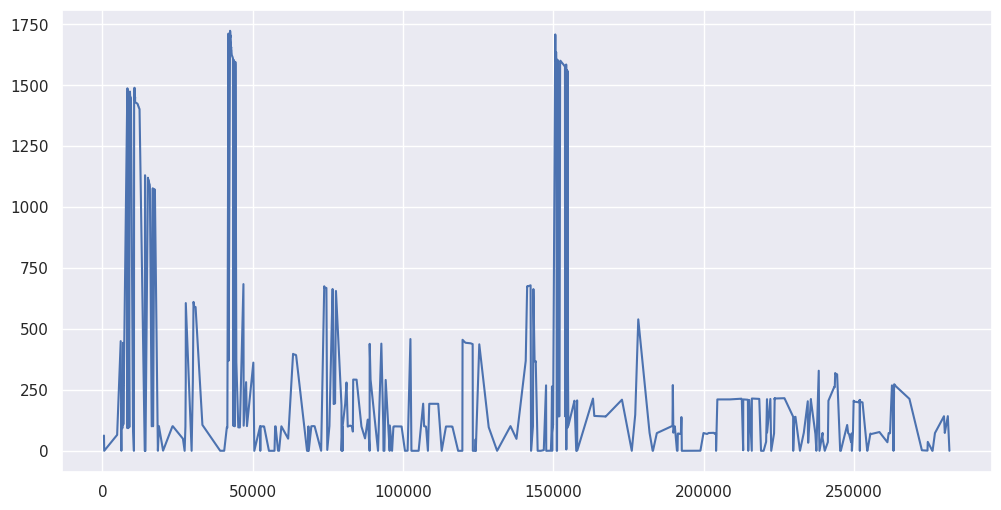

In [13]:
#Plotting the losses for the fraud transactions

fraud_scores.plot(figsize = (12,6))

Text(109.44999999999997, 0.5, 'True label')

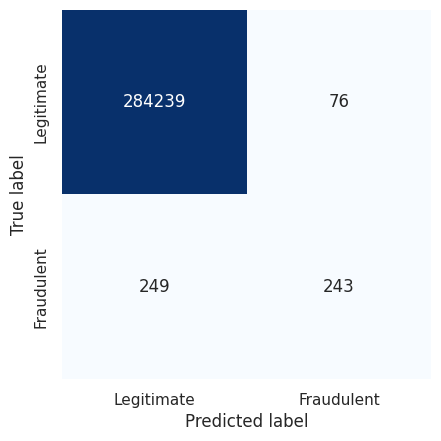

In [14]:
#Plot a confusion matrix showing how well the model identifies legitimate and fraudulent transactions with a loss threshold of 200. 
#In other words, assume that a transaction with a loss of less than 200 is legitimate while a transaction with a loss of 200 or 
#more is fraudulent, and see how the model performs.


threshold = 200

true_neg = legit_scores[legit_scores < threshold].count()
false_pos = legit_scores[legit_scores >= threshold].count()
true_pos = fraud_scores[fraud_scores >= threshold].count()
false_neg = fraud_scores[fraud_scores < threshold].count()

labels = ['Legitimate', 'Fraudulent']
mat = [[true_neg, false_pos], [false_neg, true_pos]]

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('True label')

In [15]:
#Out of 284,315 legitimate transactions, the model correctly classified 284,239 of them as legitimate while misclassifying 
#76 of them as fraudulent. This means that legitimate transactions are classified correctly more 
#than 99.97% of the time. Meanwhile, the model caught about half of the fraudulent transactions.

## Using PCA to detect Bearing Failure

In [16]:
#Using PCA to detect failures in four bearings supporting a rotating shaft with a radial load of 6000 pounds

df = pd.read_csv("https://raw.githubusercontent.com/jeffprosise/Applied-Machine-Learning/main/Chapter%206/Data/bearings.csv",index_col=0,parse_dates=[0])
df.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-02-12 10:32:39,0.058333,0.071832,0.083242,0.043067
2004-02-12 10:42:39,0.058995,0.074006,0.084435,0.044541
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118


<Axes: >

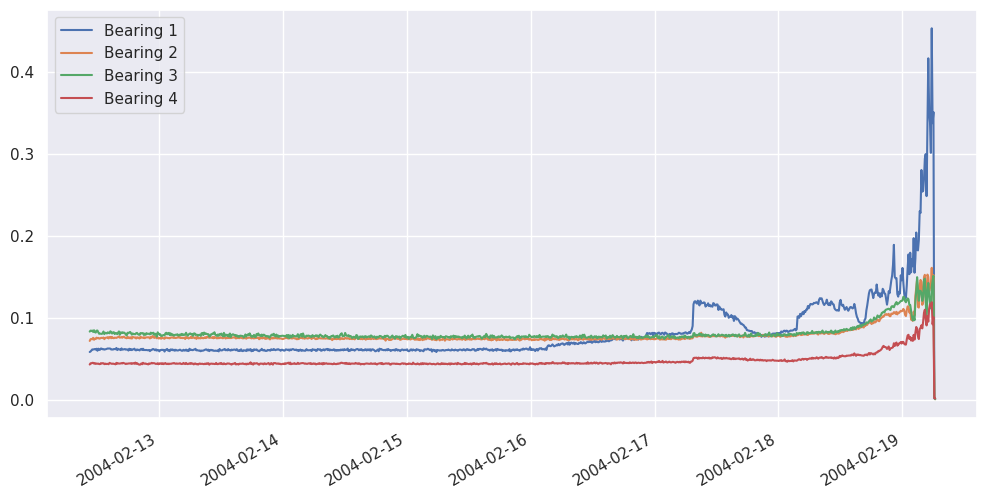

In [17]:
#Plotting the vibration data for all four bearings as a time series

df.plot(figsize=(12,6))

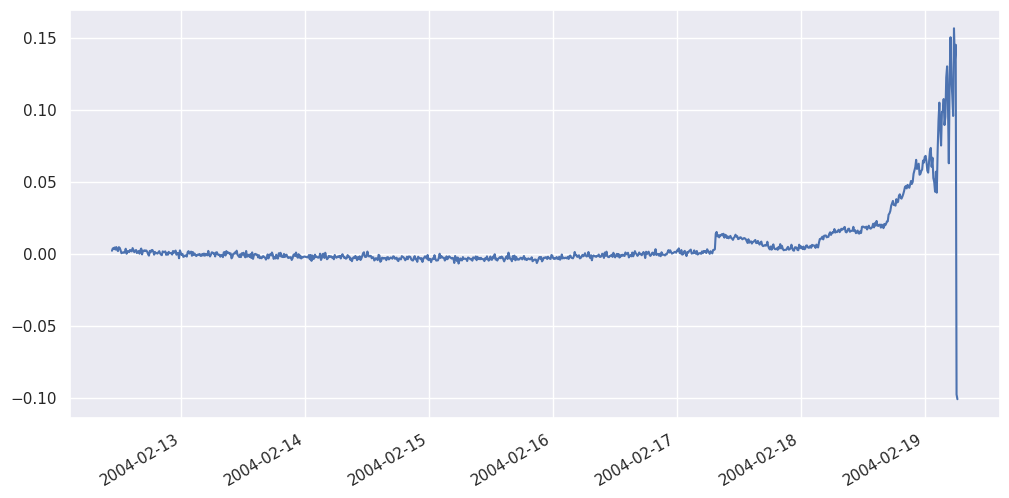

In [18]:
#Use PCA to transform and restore the data The next step is to extract samples representing "normal" operation from the dataset, 
#and reduce four dimensions to one using PCA. Then apply the same PCA transform to the remainder of the dataset, invert the 
#transform, and plot the "restored" dataset to visualize the loss incurred when a PCA transform is applied and inverted. 
#Start by reducing the dataset to one dimension with PCA and plotting the result.


from sklearn.decomposition import PCA

x_train = df['2004-02-12 10:32:39':'2004-02-13 23:42:39']
x_test = df['2004-02-13 23:52:39':]

pca = PCA(n_components=1, random_state=0)
x_train_pca = pd.DataFrame(pca.fit_transform(x_train))
x_train_pca.index = x_train.index

x_test_pca = pd.DataFrame(pca.transform(x_test))
x_test_pca.index = x_test.index

df_pca = pd.concat([x_train_pca, x_test_pca])
df_pca.plot(figsize = (12, 6))
plt.legend().remove()

<Axes: >

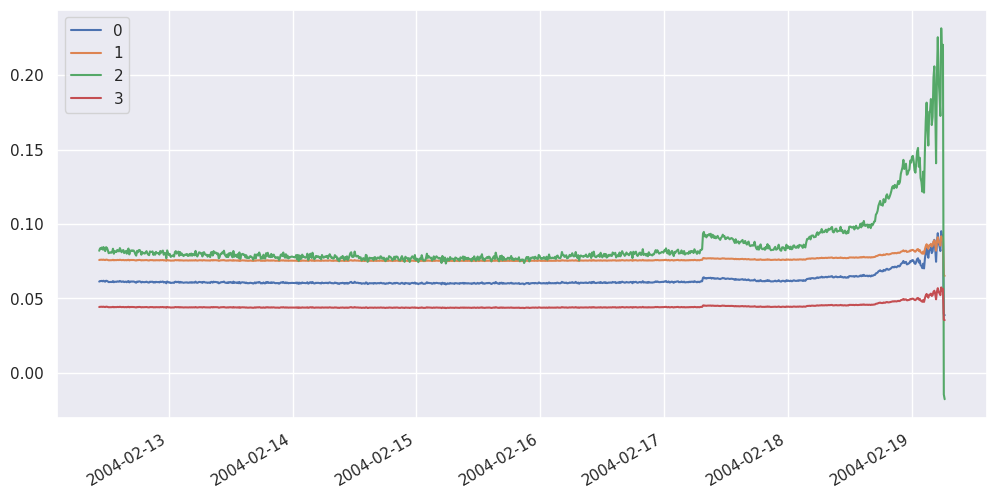

In [19]:
#Inverting the PCA transform and plotting the restored dataset

df_restored = pd.DataFrame(pca.inverse_transform(df_pca), index=df_pca.index)
df_restored.plot(figsize = (12, 6))

In [20]:
#It is obvious that loss was incurred by applying and inverting the transform. The magnitude of the loss is roughly the same 
#in all four columns, but that's not surprising given that the first five lines of each dataset represent normal operation. 
#Let's define a function that computes the loss in a range of samples.

import numpy as np

def get_anomaly_scores(df_original, df_restored):
    loss = np.sum((np.array(df_original) - np.array(df_restored)) ** 2, axis=1)
    loss = pd.Series(data=loss, index=df_original.index)
    return loss

<Axes: >

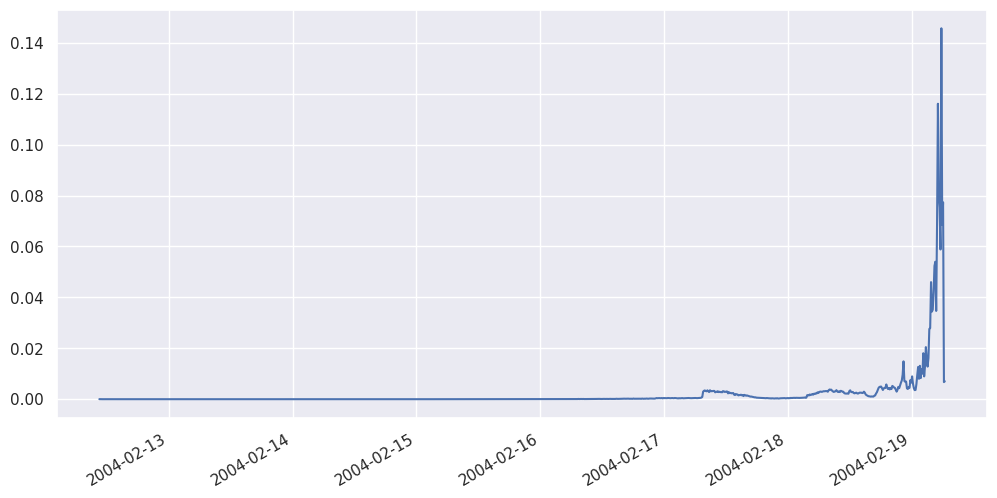

In [21]:
#Now applying the above function to all of the samples in the original dataset and the restored dataset and plot the differences over time.

scores = get_anomaly_scores(df, df_restored)
scores.plot(figsize = (12, 6))

In [22]:
#creating a function to determine if the sample is anomalous

def is_anomaly(row, pca, threshold):
    pca_row = pca.transform(row)
    restored_row = pca.inverse_transform(pca_row)
    losses = np.sum((row - restored_row) ** 2)
        
    for loss in losses:
        if loss > threshold:
            return True;

    return False

In [23]:
#Applying the function to a row early in the time series to confirm it is operating normally

x = df.loc[['2004-02-16 22:52:39']]
is_anomaly(x, pca, 0.002)

False

In [24]:
#Applying the function to a later row to confirm anonmalous behavior

x = df.loc[['2004-02-18 22:52:39']]
is_anomaly(x, pca, 0.002)

True